<a href="https://colab.research.google.com/github/jahangeer91/projects/blob/main/TimeSeriesForecasting_RetailSales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1: Generating Synthetic Data

We'll create a monthly sales dataset with a clear trend, seasonality, and some noise.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(0)
time = pd.date_range(start='2010-01-01', end='2022-12-31', freq='M')
trend = np.linspace(100, 500, len(time))
seasonality = 100 * np.sin(2 * np.pi * (time.month-1)/12) + 50 * np.cos(4 * np.pi * (time.month-1)/12)
noise = np.random.normal(scale=25, size=len(time))
sales = trend + seasonality + noise

df = pd.DataFrame({'Date': time, 'Sales': sales})
df.set_index('Date', inplace=True)


Step 2: Exploratory Data Analysis (EDA)
Let’s visualize the data to understand its components—trend, seasonality, and irregularities.

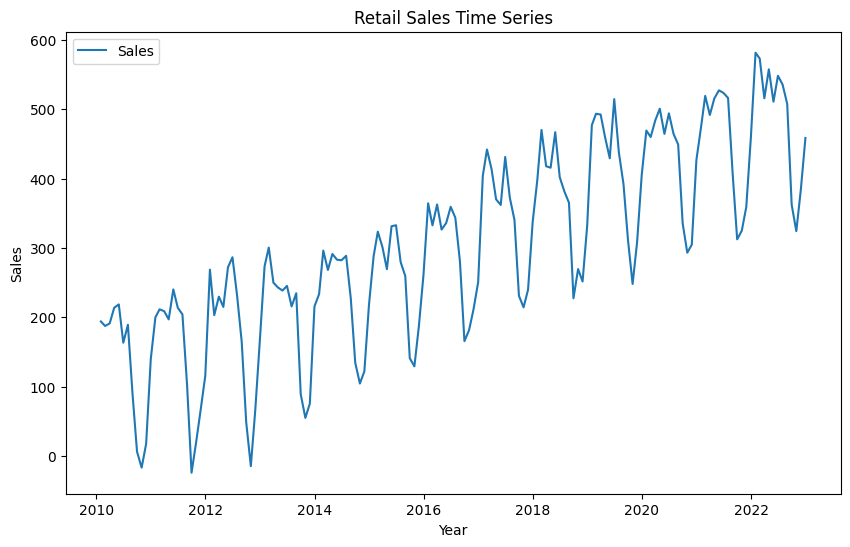

In [2]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Sales'], label='Sales')
plt.title('Retail Sales Time Series')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend()
plt.show()


Step 3: Decomposing the Time Series
We'll decompose the time series to observe its underlying components explicitly.

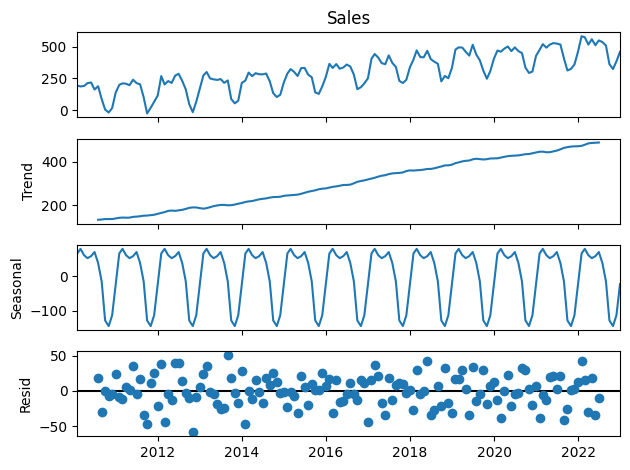

In [3]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['Sales'], model='additive')
result.plot()
plt.show()


Step 4: Time Series Forecasting Model

In [4]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define model configuration
order = (1, 1, 1)  # ARIMA Order (p,d,q)
seasonal_order = (1, 1, 1, 12)  # Seasonal order (P,D,Q,s)

# Fit model
model = SARIMAX(df['Sales'], order=order, seasonal_order=seasonal_order)
model_fit = model.fit(disp=False)

# Summary of the model
print(model_fit.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                  156
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -677.289
Date:                            Wed, 01 May 2024   AIC                           1364.577
Time:                                    06:25:40   BIC                           1379.392
Sample:                                01-31-2010   HQIC                          1370.597
                                     - 12-31-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0361      0.094     -0.385      0.700      -0.220       0.148
ma.L1         -0.9066      0.048   

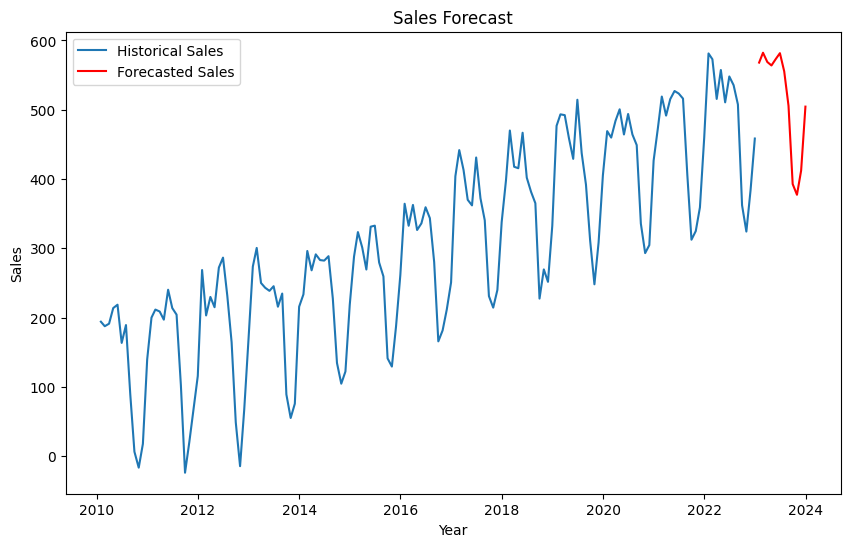

In [5]:
# Forecast
forecast = model_fit.forecast(steps=12)
forecast_index = pd.date_range(start=df.index[-1]+pd.DateOffset(months=1), periods=12, freq='M')

# Plot forecast
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Sales'], label='Historical Sales')
plt.plot(forecast_index, forecast, label='Forecasted Sales', color='red')
plt.title('Sales Forecast')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend()
plt.show()


In [7]:
from sklearn.metrics import mean_squared_error

# Extend the trend, seasonality, and noise components to generate future values
future_time = pd.date_range(start=time[-1]+pd.DateOffset(months=1), periods=12, freq='M')
future_trend = np.linspace(trend[-1], trend[-1] + 100, len(future_time))
future_seasonality = 100 * np.sin(2 * np.pi * (future_time.month-1)/12) + 50 * np.cos(4 * np.pi * (future_time.month-1)/12)
future_noise = np.random.normal(scale=25, size=len(future_time))
actual_future_values = future_trend + future_seasonality + future_noise

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(actual_future_values, forecast))
print('Test RMSE: %.3f' % rmse)



Test RMSE: 45.918
